In [1]:
import numpy as np
#now we're going to import matplotlib.pyplot
import matplotlib.pyplot as plt

# Object Oriented Plotting

Object-oriented plotting using ax objects in Matplotlib is a powerful way to create and customize plots. This approach provides finer control over the plot elements and, crucially, allows for multiple plots in the same figure. 

Object-oriented just means that we're going to think about each plot, or set of axes, as an object. We're then going to manipulate parts of that object. Then we'll put all our objects together to form our final figure.

So far we've let PyPlot handle most of our figure for us. We simply tell it what we want, and it does it in a way that makes sense. This is ok for single plots because there is no ambiguity in the x-label or title, for example. When things start to get more complex, we simply expose the underlying PyPlot structures so that we can keep everything in order.

Let's see what this looks like.

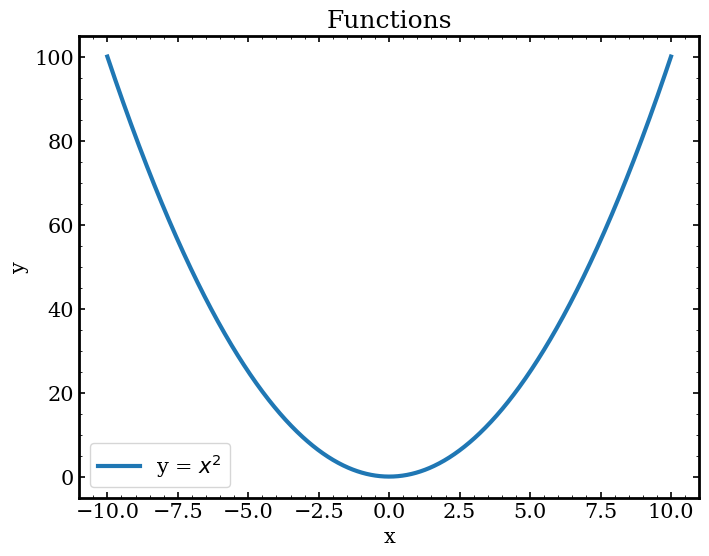

In [ ]:
# Let's make a basic plot as before, but this time using the underlying PyPlot objects.

x = np.linspace(-10, 10, 1000)
y = x**2

# Here we tell PyPlot we want to divide up our figure in some way. It will give us the 
#  corresponding figure and axes objects based on our specifications. We can unpack 
#  these right in line.
fig, ax = plt.subplots()

# Now instead of invoking plt.plot, we're going to work with our axes object directly
# Note that an axes object controls 1 plot, i.e. one x-y plane.
ax.plot(x, y, label = r'y = $x^2$')

# The syntax above looked the same as before but notice how it changed now. This is because
#  we are using the axes object functions, not the PyPlot global functions.
# The main effect is that we add set_ in front of our commands now.
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Functions')

# Here we add the legend. Notice, no set_ here
ax.legend()

# When we want to 'show', we'll still use the global PyPlot show
#  which will display all active figures.
plt.show()

Now let's see how we can use subplots to put multiple axes within 1 figure.

In [12]:
fig, axes = plt.subplots(1,2, figsize = (12, 6))

plt.close(fig)

print(type(axes), axes.shape)

<class 'numpy.ndarray'> (2,)


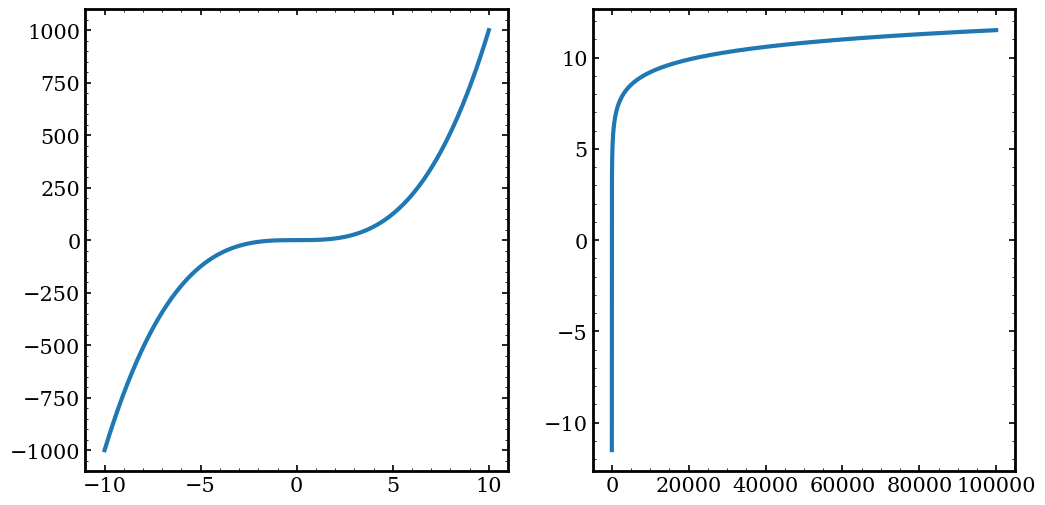

In [ ]:
x1 = np.linspace(-10, 10, 1000)
x2 = np.logspace(-5, 5, 1000)

y1 = x1**3
y2 = np.log(x2)

# Now we give subplots the number of axes in each dimension
# Since we're going to have multiple axes in one figure, adusting
#  the size of the figure is a good idea
fig, axes = plt.subplots(1,2, figsize = (12, 6))

axes[0].plot(x1, y1)
axes[1].plot(x2, y2)

#Try adding some more customization to these plots.
# 1. A title for each subplot
# 2. A global title
# 3. Axes labels for both subplots
# 4. Change the x limits for just 1 plot
# Challenge: Put the two plots together with a shared y axis


plt.show()

# Exercise 

Your objective is to diplay data with a model along with the residuals. 

- Start by choosing a model. It can be any function you want over any interval.
- Next generate some data randomly scattered about the model. You can do this by 
making it first follow the model and then adding small 
random adjustments to all the points.
- Make a figure with 2 subplots stacked vertically. They should share an x axis, 
but will have different y axes. On the top plot, show the model as a line and the 
data as points. The lower plot should be shorter than the upper plot and should show
the residual (difference between data and model) of each point. Also show the model
with a horizontal line.
- Add labels/titles/colors/etc to make the plot presentable

In [ ]:
#Your code here

# 2D Plotting using plt.imshow

While plt.plot and plt.scatter are great for visualizing data points and lines, sometimes we want to visualize an entire 2D array of values — like an image, a heatmap, or scientific measurements over a grid.

The function plt.imshow allows us to display 2D data as an image. Each value in the array corresponds to a pixel, and its color represents its magnitude.

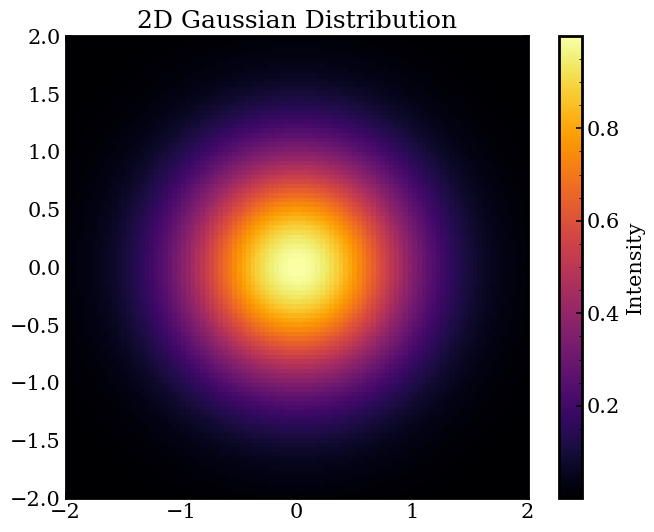

In [ ]:
# Generate a 2D Gaussian distribution
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2))

# Plot using imshow
plt.imshow(Z, extent=[-2, 2, -2, 2], origin='lower', cmap='inferno')
plt.colorbar(label="Intensity")
plt.title("2D Gaussian Distribution")
plt.show()

In [ ]:
# To see a list of all the available colormaps
#  you can run this command. You can also go to
#  the PyPlot docs where you'll be able to see
#  how the colormaps look.
plt.colormaps()

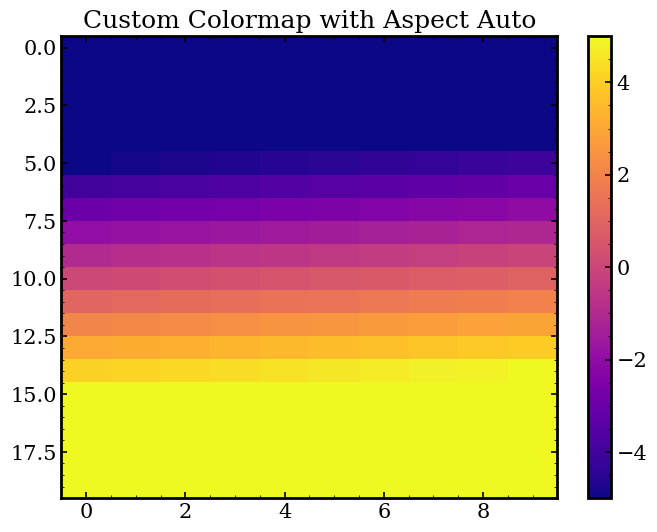

In [18]:
# Generate a gradient matrix
data = np.linspace(-10, 10, 200).reshape(20, 10)

# Plot with custom colormap and aspect ratio
plt.imshow(data, cmap='plasma', aspect='auto', vmin=-5, vmax=5)
plt.colorbar()
plt.title("Custom Colormap with Aspect Auto")
plt.show()


# Contour Plots

A contour plot is a way to visualize 2D data (like a surface) using lines or filled regions that connect points of equal value.

Think of it like looking at a topographic map — each contour line represents a specific “height” or value in your data.

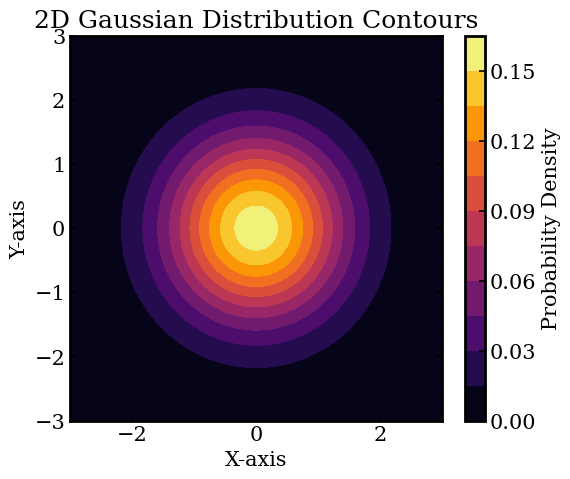

In [23]:
# Define grid
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Define 2D Gaussian function
mu_x, mu_y = 0, 0  # Mean
sigma_x, sigma_y = 1, 1  # Standard deviations
Z = (1 / (2 * np.pi * sigma_x * sigma_y)) * np.exp(
    -((X - mu_x) ** 2 / (2 * sigma_x ** 2) + (Y - mu_y) ** 2 / (2 * sigma_y ** 2))
)

# Plot filled contour
plt.figure(figsize=(6, 5))
contour = plt.contourf(X, Y, Z, levels=10, cmap='inferno')
plt.colorbar(label="Probability Density")
plt.title("2D Gaussian Distribution Contours")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


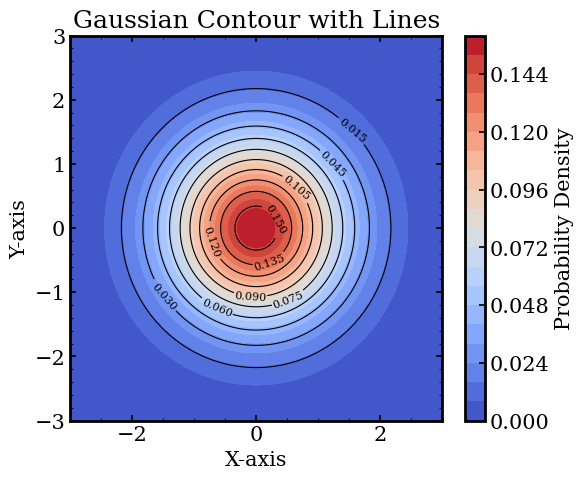

In [22]:
plt.figure(figsize=(6, 5))
contour_filled = plt.contourf(X, Y, Z, levels=20, cmap='coolwarm')
contour_lines = plt.contour(X, Y, Z, levels=10, colors='black', linewidths=0.8)
plt.clabel(contour_lines, inline=True, fontsize=8)  # Add labels to contours
plt.colorbar(contour_filled, label="Probability Density")
plt.title("Gaussian Contour with Lines")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()
